## Post Processing

In [1]:
%precision 3
%matplotlib inline
import graphviz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont

#### Read circuit vector file

In [2]:
circuit_conf = pd.read_csv('Circuit_Vector.txt', sep=' ', header=None).values.reshape(-1)
monetary_value = pd.read_csv('Monetary_Value.txt', sep=' ', header=None).values.reshape(-1)

#### Generate graph

In [3]:
# Create a directed diagram
dot = graphviz.Digraph()
dot.graph_attr['layout'] = 'neato'  # Please try 'dot' or 'twopi' generating engine if necessary
dot.graph_attr['splines'] = 'curved'

# Add some common nodes
dot.node('Feed', 'Feed', shape='box', constraint='true')
dot.node('Concentrate', 'Concentrate', shape='box', constraint='true')
dot.node('Tailings', 'Tailings', shape='box', constraint='true')

# Add unit nodes
for n in range(int((circuit_conf.size - 1) / 2)):
    dot.node("Unit{}".format(n), "Unit {}".format(n), shape='box', constraint='true')

# Add an arrow from "feed" to a certain unit
dot.edge("Feed", "Unit{}".format(circuit_conf[0]), color='blue')

# Add some arrows
for n in range(circuit_conf.size):
    if n > 0:
        if circuit_conf[n] == (circuit_conf.size - 1) / 2:  # Add an arrow from a certain unit to "concentrate"
            if n % 2 == 0:
                dot.edge("Unit{}".format(int((n - 1) / 2)), "Concentrate", color='blue')
            else:
                dot.edge("Unit{}".format(int((n - 1) / 2)), "Concentrate", color='red')
        elif circuit_conf[n] == (circuit_conf.size - 1) / 2 + 1:  # Add an arrow from a certain unit to "tailings"
            if n % 2 == 0:
                dot.edge("Unit{}".format(int((n - 1) / 2)), "Tailings", color='blue')
            else:
                dot.edge("Unit{}".format(int((n - 1) / 2)), "Tailings", color='red')
        else:  # Add an arrow from unit to unit
            if n % 2 == 0:
                dot.edge("Unit{}".format(int((n - 1) / 2)), "Unit{}".format(circuit_conf[n]), color='blue')
            else:
                dot.edge("Unit{}".format(int((n - 1) / 2)), "Unit{}".format(circuit_conf[n]), color='red')

# Show image
dot.render('flowchart', format='png', view=False)

'flowchart.png'

In [4]:
# Open image
image = Image.open('flowchart.png')

# Add text to image
draw = ImageDraw.Draw(image)
font = ImageFont.truetype("arial.ttf", 10)  # Set font
title_text = "Vector: "
title_text += np.array2string(circuit_conf)
title_position = (100, 10)  # Set position
draw.text(title_position, title_text, font=font, fill=(0, 0, 0))  # Add text

title_text = "Optimum: "
title_text += str(monetary_value[0])
title_position = (100, 20) 
draw.text(title_position, title_text, font=font, fill=(0, 0, 0))

# Save image with text
image.save('flowchart.png')

#### Show the image

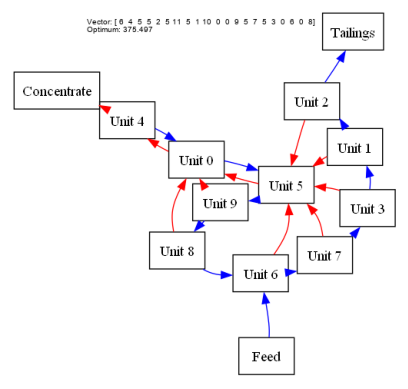

In [5]:
# Read image
image = plt.imread('flowchart.png')

# Show image
plt.imshow(image)
plt.axis('off')  # Delete axiss
plt.show()